In [83]:
%matplotlib inline

In [24]:
import itertools
import collections
import re

import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

plt.rcParams['figure.figsize'] = [12, 8]

# Explorative analysis of the training set

Read training data tsv:

In [5]:
train = pd.read_csv('../data/train_consol.txt', sep='\t',
                    header=None, index_col=0, names=['index', 'label', 'tweet'])

In [6]:
train.head()

,label,tweet
index,,
264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


Distribution of the polarity labels:

## Distribution of polarity labels

<AxesSubplot:xlabel='label'>

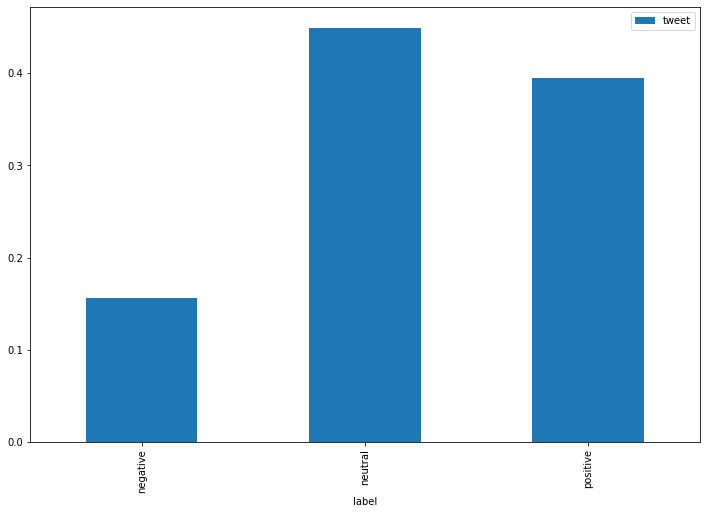

In [9]:
train.groupby('label').count().apply(lambda x: x / x.sum()).plot.bar()

The labels are imbalanced - negative tweets make up 15% of all data, neutral about 45%, positive 40%.

## Distribution of tweet lengths

In a first step, URLs are removed as they bias the tweet length:

In [99]:
train['tweet'] = train['tweet'].str.strip() # strip leading/training whitespace
train['tweet'] = train['tweet'].str.replace(r'http\S+|www.\S+', '', case=False)

Check the distribution of tweet lengths (in characters):

In [100]:
train['tweet_len'] = train['tweet'].apply(len)
train['tweet_len'].describe()

count    50131.000000
mean       109.498474
std         53.474520
min         10.000000
25%         91.000000
50%        113.000000
75%        132.000000
max       7008.000000
Name: tweet_len, dtype: float64

Given the age of the data set, tweets should be restricted to 140 chars, longer tweets might might be faulty observations.

In [101]:
train_clean = train[train['tweet_len'] < 141]

In [102]:
len(train) - len(train_clean)

2567

Removing tweets longer than 140 chars drops 2567 observations from the training set.

In [16]:
train_clean['tweet_len'].describe()

count    47564.000000
mean       106.977988
std         25.549071
min         10.000000
25%         90.000000
50%        113.000000
75%        128.000000
max        140.000000
Name: tweet_len, dtype: float64

In [17]:
train_clean.groupby('label').describe()

tweet_len                                                        
             count        mean        std   min   25%    50%    75%    max
label                                                                     
negative    7298.0  111.677446  24.571300  29.0  96.0  115.0  134.0  140.0
neutral    21441.0  106.199851  25.649318  10.0  89.0  113.0  127.0  140.0
positive   18825.0  106.042390  25.609535  17.0  89.0  112.0  127.0  140.0

The distribution of tweet lengths by polarity in the clean dataset is very similar, with positive and neutral tweets being slightly shorter than negative tweets.

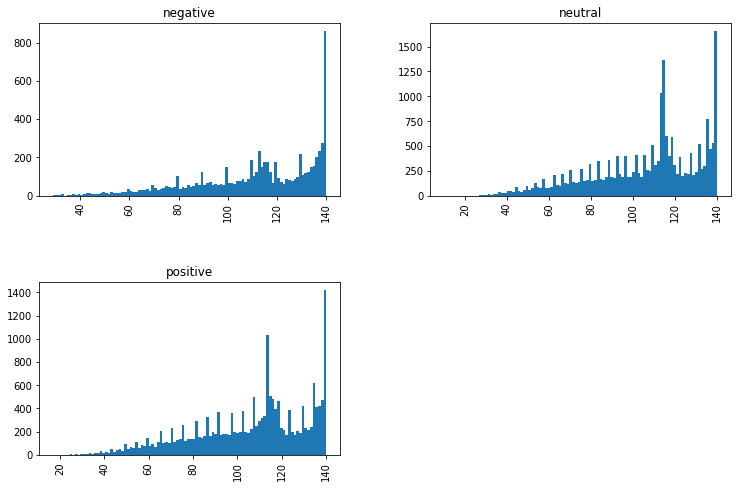

In [18]:
ax = train_clean.hist(by='label', bins=100, grid=True)

Creating a corpus from the training set:

In [19]:
corpus = list(itertools.chain(*train_clean['tweet'].str.split().values.tolist()))
counter = collections.Counter([w for w in corpus if w.lower() not in STOPWORDS])

The word cloud of the most common words in the corpus (excluding stop words)
shows an interesting snapshot of the time when the data was generated:

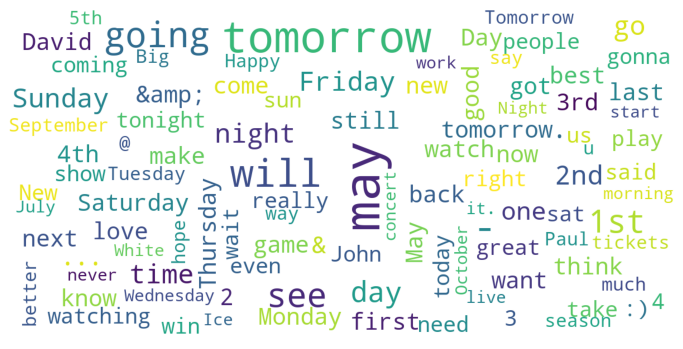

In [103]:
wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1234)
   
cloud = wordcloud.generate_from_frequencies(counter)

plt.axis('off')

plt.imshow(cloud)
plt.show()